Creado por Juan Pablo Bautista Gómez

Repositorio del proyecto: https://github.com/PabloBautistaG/Data_Science


# Relación entre las características de una canción y su popularidad en Spotify

In [ ]:
import numpy as np
import matplotlib
import pandas as pd

# Lectura del dataset

In [ ]:
df = pd.read_csv("/content/sample_data/spotify_dataset.csv")

Datos extraídos del dataset

In [ ]:
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


# Preprocesamiento de los datos

La columna "Streams" se mueve al final del dataset

In [ ]:
col_to_move = 'Streams'
column = df.pop(col_to_move)
df[col_to_move] = column

Información de los datos contenidos en cada columna

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Artist                     1556 non-null   object
 6   Artist Followers           1556 non-null   object
 7   Song ID                    1556 non-null   object
 8   Genre                      1556 non-null   object
 9   Release Date               1556 non-null   object
 10  Weeks Charted              1556 non-null   object
 11  Popularity                 1556 non-null   object
 12  Danceability               1556 non-null   object
 13  Energy                     1556 non-null   object
 14  Loudness

Eliminación de filas que contengan celdas vacías

In [ ]:
indices_a_eliminar = []

for index, row in df.iterrows():
    if any(pd.isna(cell) or cell == '' or str(cell).isspace() for cell in row):
        indices_a_eliminar.append(index)

df = df.drop(indices_a_eliminar)

print(df)

      Index  Highest Charting Position  Number of Times Charted  \
0         1                          1                        8   
1         2                          2                        3   
2         3                          1                       11   
3         4                          3                        5   
4         5                          5                        1   
...     ...                        ...                      ...   
1551   1552                        195                        1   
1552   1553                        196                        1   
1553   1554                        197                        1   
1554   1555                        198                        1   
1555   1556                        199                        1   

     Week of Highest Charting                           Song Name  \
0      2021-07-23--2021-07-30                             Beggin'   
1      2021-07-23--2021-07-30           STAY (with Justin

Eliminación del caracter "," en la columna "Streams"

In [ ]:
df['Streams'] = df['Streams'].str.replace(',', '').astype(int)

Transformación del tipo de dato en las columnas del dataset

In [ ]:
columnas_a_convertir = ['Danceability', 'Energy', 'Loudness', 'Speechiness','Acousticness', 'Liveness',
                         'Tempo','Valence']
df[columnas_a_convertir] = df[columnas_a_convertir].astype(float)

columnas_a_convertir = ['Duration (ms)','Popularity','Artist Followers','Streams']
df[columnas_a_convertir] = df[columnas_a_convertir].astype(int)

Información de los datos de cada columna después de la transformación

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1545 non-null   int64  
 1   Highest Charting Position  1545 non-null   int64  
 2   Number of Times Charted    1545 non-null   int64  
 3   Week of Highest Charting   1545 non-null   object 
 4   Song Name                  1545 non-null   object 
 5   Artist                     1545 non-null   object 
 6   Artist Followers           1545 non-null   int64  
 7   Song ID                    1545 non-null   object 
 8   Genre                      1545 non-null   object 
 9   Release Date               1545 non-null   object 
 10  Weeks Charted              1545 non-null   object 
 11  Popularity                 1545 non-null   int64  
 12  Danceability               1545 non-null   float64
 13  Energy                     1545 non-null   float64
 1

Atributos del dataset

In [ ]:
df.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Artist', 'Artist Followers',
       'Song ID', 'Genre', 'Release Date', 'Weeks Charted', 'Popularity',
       'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Liveness', 'Tempo', 'Duration (ms)', 'Valence', 'Chord', 'Streams'],
      dtype='object')

Uso de la libreria LabelEncoder para convertir datos categoricos en númericos

In [ ]:
from sklearn.preprocessing import LabelEncoder

genre_encoder = LabelEncoder()
df['Genre'] = genre_encoder.fit_transform(df['Genre'])

Eliminación de las columnas con poca o nula relevancia para el estudio de los datos


In [ ]:
df = df.drop(columns=['Index','Week of Highest Charting',
                      'Song Name','Weeks Charted','Artist','Song ID','Release Date','Chord'])
df

,Highest Charting Position,Number of Times Charted,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Streams
0,1,8,3377762,276,100,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560,0.589,48633449
1,2,3,2230022,63,99,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806,0.478,47248719
2,1,11,6266514,364,99,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147,0.688,40162559
3,3,5,83293380,363,98,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041,0.591,37799456
4,5,1,5473565,312,96,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000,0.894,33948454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,27167675,179,79,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320,0.608,4630675
1552,196,1,15019109,379,66,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930,0.714,4623030
1553,197,1,22698747,155,81,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307,0.394,4620876
1554,198,1,208630,84,60,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784,0.881,4607385


## Estandarización de los datos

Se estandarizan los datos para el correcto funcionamiento de alguno de los métodos de minería utilizados, a partir de la librería "StandardScaler"

In [ ]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()

scal.fit(df.drop('Streams',axis=1))

StandardScaler()

Se estandarizan todas las columnas, excepto la que contenga el atributo objetivo

In [ ]:
scal_features = scal.transform(df.drop('Streams',axis=1))
scal_features

array([[-1.49407017, -0.16382249, -0.68019646, ...,  0.37830986,
         0.28894808,  0.32693295],
       [-1.47686238, -0.46898978, -0.74904547, ...,  1.59278472,
        -1.19097065, -0.1615115 ],
       [-1.49407017,  0.01927788, -0.50691006, ...,  1.49137002,
        -0.41995069,  0.7625726 ],
       ...,
       [ 1.87865583, -0.5910567 ,  0.47880366, ..., -0.60250553,
         0.4108779 , -0.53114514],
       [ 1.89586361, -0.5910567 , -0.8703019 , ...,  1.05650377,
        -0.95805859,  1.61184989],
       [ 1.9130714 , -0.5910567 ,  1.6502739 , ...,  2.78758513,
         0.49574293, -0.40793393]])

Creación de un nuevo conjunto de datos a partir de los datos estandarizados

In [ ]:
df2 = pd.DataFrame(scal_features,columns=df.columns[:-1])
df2

,Highest Charting Position,Number of Times Charted,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,-1.494070,-0.163822,-0.680196,0.478778,1.890818,0.168565,1.030832,0.614109,-0.663867,-0.486302,1.234497,0.378310,0.288948,0.326933
1,-1.476862,-0.468990,-0.749045,-1.414569,1.827602,-0.695212,0.807956,0.344622,-0.682898,-0.840755,-0.542980,1.592785,-1.190971,-0.161512
2,-1.494070,0.019278,-0.506910,1.261006,1.827602,-0.891844,0.188856,0.520028,0.274990,0.344884,-0.668654,1.491370,-0.419951,0.762573
3,-1.459655,-0.346923,4.113669,1.252117,1.764387,0.828687,1.631359,1.051029,-0.805239,-0.806388,1.269213,0.108682,0.702262,0.335734
4,-1.425239,-0.591057,-0.554476,0.798781,1.637956,0.323061,0.436496,-0.422778,-0.563275,-0.912684,-0.910279,0.918952,0.298283,1.669055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,1.844240,-0.591057,0.746879,-0.383451,0.563293,0.505648,0.411732,0.130547,-0.491683,-0.983375,-0.195817,-0.227778,0.241424,0.410541
1541,1.861448,-0.591057,0.018128,1.394341,-0.258508,-1.137634,1.464202,1.285834,-0.349404,-0.034744,1.053972,0.999238,-0.339690,0.876983
1542,1.878656,-0.591057,0.478804,-0.596786,0.689724,0.526716,-0.684076,0.803468,-0.848738,-0.258525,-0.341625,-0.602506,0.410878,-0.531145
1543,1.895864,-0.591057,-0.870302,-1.227901,-0.637801,0.997228,-0.516919,-0.270096,-0.588650,0.001221,0.005538,1.056504,-0.958059,1.611850


Matriz de correlación de los datos sin estandarizar

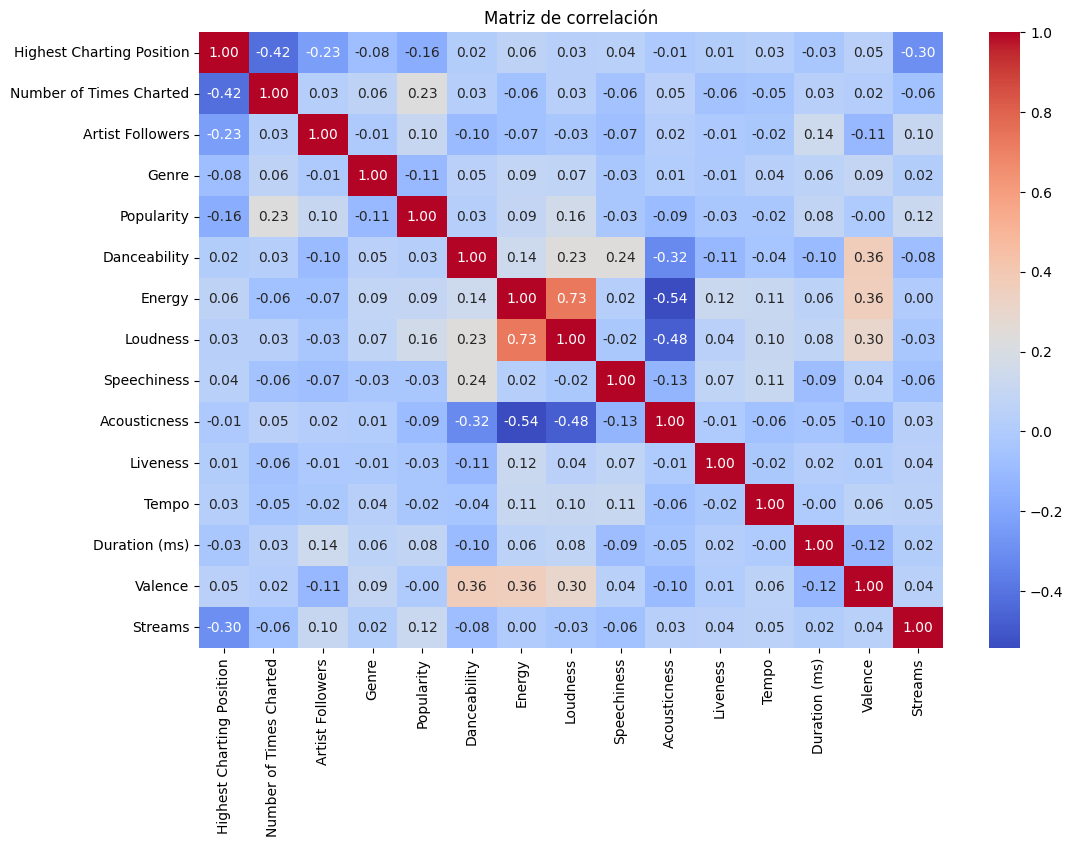

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [ ]:
df.columns

Index(['Highest Charting Position', 'Number of Times Charted',
       'Artist Followers', 'Genre', 'Popularity', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo',
       'Duration (ms)', 'Valence', 'Streams'],
      dtype='object')

Diagrama de disperción entre los atributos "Popularity" y "Loudness"


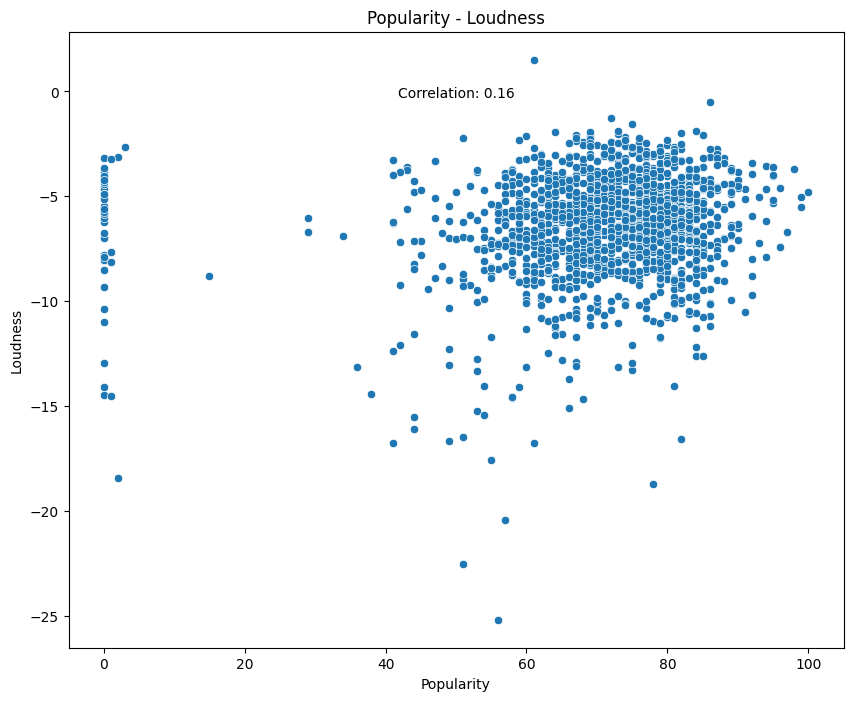

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Popularity - Loudness")
sns.scatterplot(x='Popularity', y='Loudness', data=df)

# Calcula la correlación entre 'Popularity' y 'Loudness'
correlation = df['Popularity'].corr(df['Loudness'])

# Muestra el valor de correlación en el gráfico
plt.text(0.5, 0.9, f'Correlation: {correlation:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

Diagrama de disperción entre los atributos "Popularity" y "Energy"

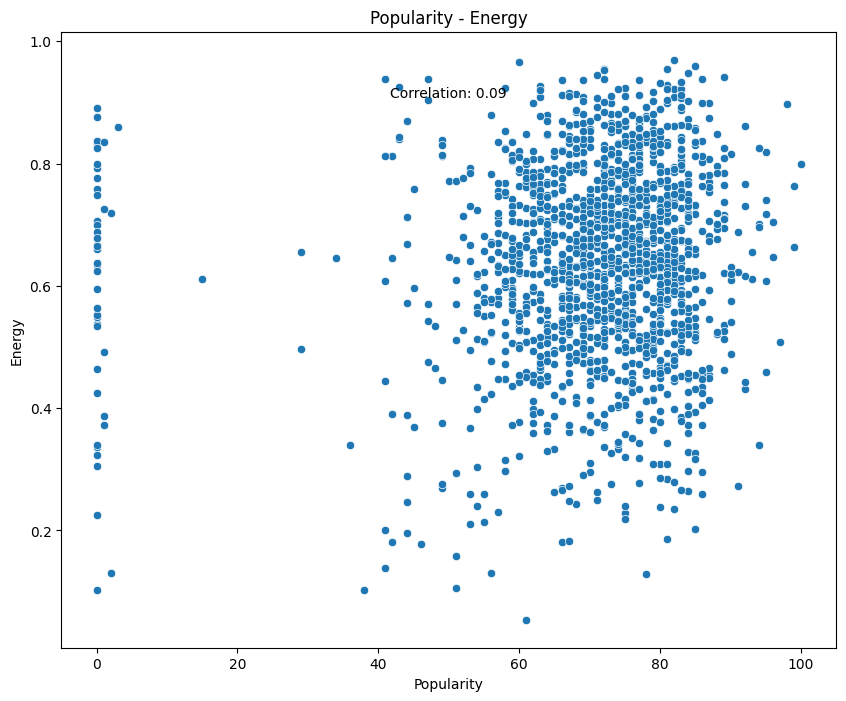

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Popularity - Energy")
sns.scatterplot(x='Popularity', y='Energy', data=df)

# Calcula la correlación entre 'Popularity' y 'Loudness'
correlation = df['Popularity'].corr(df['Energy'])

# Muestra el valor de correlación en el gráfico
plt.text(0.5, 0.9, f'Correlation: {correlation:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

Diagrama de disperción entre los atributos "Popularity" y "Danceability"

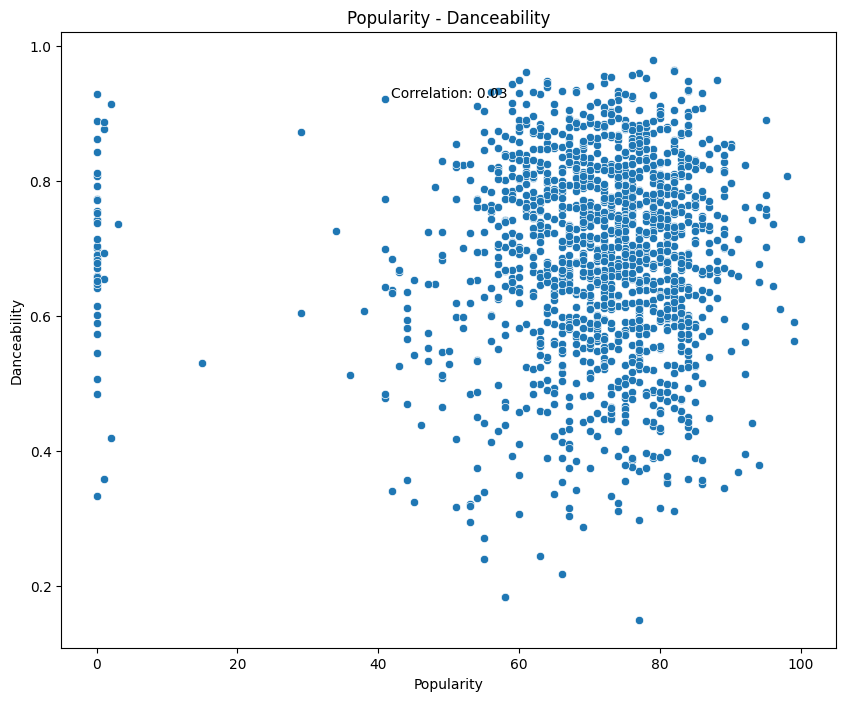

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Popularity - Danceability")
sns.scatterplot(x='Popularity', y='Danceability', data=df)

# Calcula la correlación entre 'Popularity' y 'Loudness'
correlation = df['Popularity'].corr(df['Danceability'])

# Muestra el valor de correlación en el gráfico
plt.text(0.5, 0.9, f'Correlation: {correlation:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

# Evaluación de los modelos

## Con datos SIN estandarizar

Separación del atributo objetivo del conjunto de datos


In [ ]:
X = df.drop(columns=['Streams'])
y = df['Streams']

X

,Highest Charting Position,Number of Times Charted,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,3377762,276,100,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560,0.589
1,2,3,2230022,63,99,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806,0.478
2,1,11,6266514,364,99,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147,0.688
3,3,5,83293380,363,98,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041,0.591
4,5,1,5473565,312,96,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000,0.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,27167675,179,79,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320,0.608
1552,196,1,15019109,379,66,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930,0.714
1553,197,1,22698747,155,81,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307,0.394
1554,198,1,208630,84,60,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784,0.881


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 0 to 1555
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1545 non-null   int64  
 1   Number of Times Charted    1545 non-null   int64  
 2   Artist Followers           1545 non-null   int64  
 3   Genre                      1545 non-null   int64  
 4   Popularity                 1545 non-null   int64  
 5   Danceability               1545 non-null   float64
 6   Energy                     1545 non-null   float64
 7   Loudness                   1545 non-null   float64
 8   Speechiness                1545 non-null   float64
 9   Acousticness               1545 non-null   float64
 10  Liveness                   1545 non-null   float64
 11  Tempo                      1545 non-null   float64
 12  Duration (ms)              1545 non-null   int64  
 13  Valence                    1545 non-null   float64
dt

Separación de los datos en conjuntos de prueba (30%) y entrenamiento (70%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_train

494     5198514
242     5321544
1316    5004752
692     6400108
1406    8362828
         ...   
770     5361669
843     5304382
1226    4367368
563     5072462
690     6635128
Name: Streams, Length: 1081, dtype: int64

## Regresión lineal (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

Entrenamiento del modelo

In [ ]:
LR.fit(X_train, y_train)

LinearRegression()

Precisición del modelo con los datos de entrenamiento

In [ ]:
score = LR.score(X_train,y_train)
score

0.1541395181499422

Predicciones del modelo con datos de prueba

In [ ]:
pred_LR = LR.predict(X_test)
pred_LR

array([4483946.01696168, 5334447.25853303, 8346696.68073369,
       4686465.24734457, 5479698.923773  , 8392988.22075852,
       4760318.87229577, 5065859.58091112, 4672844.78940799,
       5851083.64065558, 7597349.54220395, 5237729.3103505 ,
       6966795.94285751, 5418100.77977396, 7049447.54528994,
       4627708.67267627, 3818795.05877117, 5780071.93766   ,
       5064313.87693684, 5580626.88067221, 5985448.12615456,
       8175189.58911277, 7967094.48855643, 5295134.64486694,
       7340845.32309054, 6465239.93313533, 6423148.7031622 ,
       7573255.5853546 , 5100044.66124015, 5927859.85466224,
       7034808.15050266, 6622327.40054096, 4627298.57762113,
       5889477.16550017, 6636505.62340608, 5367871.99493651,
       4749379.70548466, 5642540.53168118, 5455548.67557915,
       6065384.09500635, 3841103.5987369 , 5196625.72430454,
       7883944.92104776, 5614458.14333791, 4950639.63037587,
       6500685.15562852, 7906716.40974585, 6753018.03365912,
       7545945.18159165,

Rendimiento del modelo, la donde R^2 es la más representativa debido a que se está prediciendo una variable númerica




In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, pred_LR)
mae = mean_absolute_error(y_test, pred_LR)
r2 = r2_score(y_test, pred_LR)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 14326060139766.414
Mean Absolute Error: 1905313.0548337277
R^2 Score: 0.1417644915285875


## Bosque de regresión (Random Forest Regressor)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

RFR = RandomForestRegressor(n_estimators=50)

### Busqueda de hiperparámetros

Uso de la librería "Randimized Search" para encontrar los mejores hiperparametros para el modelo

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"max_depth": range(2,15),
              "max_features": range(1,9),
              "min_samples_leaf": [5, 10, 50, 100],
              "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"]}

rdm_search = RandomizedSearchCV(RandomForestRegressor(random_state=0), param_dist, random_state=0)
search_fit = rdm_search.fit(X_train,y_train)
search_fit.best_params_

{'min_samples_leaf': 10,
 'max_features': 6,
 'max_depth': 10,
 'criterion': 'squared_error'}

Rendimiento del modelo con los mejores hiperparámetros

In [ ]:
search_fit.best_score_

0.5790736537307157

Definición del modelo con los hiperparámetros encontrados

In [ ]:
RFR = RandomForestRegressor(min_samples_leaf=10,
                            max_features=6,
                            max_depth=10,
                            criterion='squared_error')

Entrenamiento del modelo

In [ ]:
RFR.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=10)

Rendimiento del modelo con los datos de entrenamiento

In [ ]:
RFR.score(X_train,y_train)

0.6474385205412605

Predicciones del modelo con los datos de prueba

In [ ]:
predictions = RFR.predict(X_test)

Rendimiento del modelo, la donde R^2 es la más representativa debido a que se está prediciendo una variable númerica




In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 7046796591631.65
Mean Absolute Error: 1068031.6150700038
R^2 Score: 0.5778454790144266


### Importancia de los atributos

Importancia de los atributos en el metodo "Bosque de regresión"

In [ ]:
imp_RFor = pd.DataFrame({'Atributo': X.columns, 'Importancia': RFR.feature_importances_})
imp_RFor = imp_RFor.sort_values('Importancia',ascending=False)
imp_RFor

,Atributo,Importancia
4,Popularity,0.308414
0,Highest Charting Position,0.202442
1,Number of Times Charted,0.140032
2,Artist Followers,0.089776
11,Tempo,0.046338
13,Valence,0.046281
7,Loudness,0.030079
5,Danceability,0.029841
12,Duration (ms),0.023805
9,Acousticness,0.021188


## Con datos estandarizados

Separación del atributo objetivo del conjunto de datos con los datos estandarizados


In [ ]:
X = df2
y = df['Streams']

X

,Highest Charting Position,Number of Times Charted,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,-1.494070,-0.163822,-0.680196,0.478778,1.890818,0.168565,1.030832,0.614109,-0.663867,-0.486302,1.234497,0.378310,0.288948,0.326933
1,-1.476862,-0.468990,-0.749045,-1.414569,1.827602,-0.695212,0.807956,0.344622,-0.682898,-0.840755,-0.542980,1.592785,-1.190971,-0.161512
2,-1.494070,0.019278,-0.506910,1.261006,1.827602,-0.891844,0.188856,0.520028,0.274990,0.344884,-0.668654,1.491370,-0.419951,0.762573
3,-1.459655,-0.346923,4.113669,1.252117,1.764387,0.828687,1.631359,1.051029,-0.805239,-0.806388,1.269213,0.108682,0.702262,0.335734
4,-1.425239,-0.591057,-0.554476,0.798781,1.637956,0.323061,0.436496,-0.422778,-0.563275,-0.912684,-0.910279,0.918952,0.298283,1.669055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,1.844240,-0.591057,0.746879,-0.383451,0.563293,0.505648,0.411732,0.130547,-0.491683,-0.983375,-0.195817,-0.227778,0.241424,0.410541
1541,1.861448,-0.591057,0.018128,1.394341,-0.258508,-1.137634,1.464202,1.285834,-0.349404,-0.034744,1.053972,0.999238,-0.339690,0.876983
1542,1.878656,-0.591057,0.478804,-0.596786,0.689724,0.526716,-0.684076,0.803468,-0.848738,-0.258525,-0.341625,-0.602506,0.410878,-0.531145
1543,1.895864,-0.591057,-0.870302,-1.227901,-0.637801,0.997228,-0.516919,-0.270096,-0.588650,0.001221,0.005538,1.056504,-0.958059,1.611850


Separación de los datos en conjuntos de prueba (30%) y entrenamiento (70%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Perceptrón multicapa (Multi-layer Perceptron regressor)

### Busqueda de hiperparámetros

Uso de la librería "Randimized Search" para encontrar los mejores hiperparametros para el modelo

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(random_state=1, max_iter=10000)

param_dist = {'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
              'activation': ['tanh', 'relu'],
              'solver': ['sgd', 'adam'],
              'alpha': [0.0001, 0.05],
              'learning_rate': ['constant', 'adaptive']}

rdm_search = RandomizedSearchCV(clf, param_dist, random_state=0, refit=True, verbose=False, cv = 3)
search_fit = rdm_search.fit(X_train,y_train)
search_fit.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/lo

{'solver': 'adam',
 'learning_rate': 'constant',
 'hidden_layer_sizes': (50, 50, 50),
 'alpha': 0.05,
 'activation': 'relu'}

In [ ]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(random_state=1, max_iter=10000, solver='adam',learning_rate='constant',hidden_layer_sizes=(50, 50, 50),
                   alpha=0.05,activation='relu')

Entrenamiento del modelo con los datos de entrenamiento

In [ ]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.05, hidden_layer_sizes=(50, 50, 50), max_iter=10000,
             random_state=1)

Rendmiento del modelo con los datos de entrenamiento

In [ ]:
score = clf.score(X_train,y_train)
score

0.9459736190751886

Predicciones del modelo con los datos de prueba

In [ ]:
pred_mlpr = clf.predict(X_test)
pred_mlpr

array([ 5366593.09566054,  4641336.409682  , 10134486.24154379,
        5196856.45180487,  4415800.08651516,  8008044.2724727 ,
        5852983.42769924,  5917229.17329496,  5494912.53913588,
        5786946.31672591,  4031384.52033375,  5217271.72680071,
        9564299.08168638,  5969257.60021068,  8965588.29712003,
        5571186.85662263,  3851910.51465128,  7156829.17258884,
        5354373.56722279,  4943778.31572863,  5403002.36724803,
       26817338.03819149, 13665722.78942069,  5613464.78367374,
        4502402.48961311,  6271410.09578549,  6354135.25282282,
       18429795.01663136,  6389420.70402953,  4933385.67390642,
        4997015.83168233,  9547871.30398294,  5616627.93579864,
        4438234.87422755,  7936594.73227778,  5202938.05889934,
        4578258.83663971,  5418585.68447236,  4283758.98368113,
        4647650.84603929,  5041483.95403903,  4696214.79017485,
        6408368.02956708, 13544095.83071815,  5370524.46412775,
        5150052.8805115 ,  7294916.36241

Rendimiento del modelo, la donde R^2 es la más representativa debido a que se está prediciendo una variable númerica


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, pred_mlpr)
mse = mean_squared_error(y_test, pred_mlpr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_mlpr)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 1128498.6695689515
Mean Squared Error (MSE): 4143099103817.1763
Root Mean Squared Error (RMSE): 2035460.4156841706
R² Score: 0.7517981404990832


### Importancia de los atributos

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)

importances = result.importances_mean
std = result.importances_std
feature_names = X.columns

importance_df = pd.DataFrame({
    'Característica': feature_names,
    'Importancia': importances
})

importance_df = importance_df.sort_values(by='Importancia', ascending=False)

print(importance_df.to_string(index=False))

           Característica  Importancia
  Number of Times Charted     0.807504
               Popularity     0.790953
Highest Charting Position     0.665752
                    Genre     0.100973
             Acousticness     0.091626
                 Loudness     0.062378
                   Energy     0.034375
                  Valence     0.031450
             Danceability     0.021487
                    Tempo     0.012732
                 Liveness     0.010351
         Artist Followers     0.004512
              Speechiness     0.003596
            Duration (ms)    -0.009772


## Máquina de soporte vectoriol (Support Vector Machine)

### Busqueda de hiperparámetros

Uso de la librería "Randimized Search" para encontrar los mejores hiperparametros para el modelo

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_dist = parameters = {
    "kernel": ["rbf","linear"],
    "C": [1,10,10,100,1000],
    "gamma": [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1,10,100,1000]
    }

grid_search = GridSearchCV(SVR(),param_dist,cv=10,refit=True,verbose=False)

grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 1000, 'gamma': 1e-08, 'kernel': 'linear'}

Definición del modelo

In [ ]:
from sklearn.svm import SVR

svr = SVR(C= 1000, gamma= 1e-08, kernel= "linear")
svr

SVR(C=1000, gamma=1e-08, kernel='linear')

Entrenamiento del módelo

In [ ]:
svr.fit(X_train, y_train)

SVR(C=1000, gamma=1e-08, kernel='linear')

Rendimiento del módelo con los datos de entrenamiento

In [ ]:
svr.score(X_train,y_train)

-0.054281717928956974

Predicciones del modelo con los datos de prueba

In [ ]:
pred_svr = svr.predict(X_test)
pred_svr

array([5084329.04258849, 5110488.4719255 , 5679982.70393595,
       5130162.29726509, 5149807.3605784 , 5794764.10182887,
       5316940.46126164, 5393794.70942823, 5170141.03802835,
       5561035.02793633, 5575502.18684588, 5315921.17532142,
       5452190.12886192, 5222311.0484601 , 5479795.6613722 ,
       5332134.00975415, 5161602.29380558, 5125339.37517153,
       5200900.16284378, 5230491.59128639, 5332504.12751285,
       5297469.18100986, 5705577.77162109, 5068714.63133182,
       5352845.30017214, 5276808.39524283, 5465251.51679644,
       5513688.40458213, 5045953.65292035, 5333169.83034255,
       5466570.13440877, 5447105.54180154, 5172497.56595277,
       5279798.52893564, 5330367.70911909, 5230284.96134691,
       5056300.92162403, 5194666.52391319, 5204692.9616667 ,
       5151795.26128958, 5211291.26533273, 5221710.240833  ,
       5583694.58509475, 5167970.05126994, 5212116.02762533,
       5273875.35470706, 5714852.30034896, 5387440.60239089,
       5735011.07639031,

Rendimiento del modelo, la donde R^2 es la más representativa debido a que se está prediciendo una variable númerica


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, pred_svr)
mse = mean_squared_error(y_test, pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_svr)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 1734570.318895308
Mean Squared Error (MSE): 18098116632500.875
Root Mean Squared Error (RMSE): 4254188.128480083
R² Score: -0.08420920887761763
